In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# cwd = os.getcwd()
# cwd

In [3]:
# raw_csv_data = pd.read_csv(cwd + '\TG.csv')
raw_csv_data = pd.read_csv('WB.csv')
df=raw_csv_data.copy()

In [4]:
para = 'Recovered'

In [5]:
df.Date.describe()

count           115
unique          115
top       14-Mar-20
freq              1
Name: Date, dtype: object

In [6]:
df

,Date,Confirmed,Recovered,Decreased
0,14-Mar-20,0,0,0
1,15-Mar-20,0,0,0
2,16-Mar-20,0,0,0
3,17-Mar-20,1,0,0
4,18-Mar-20,0,0,0
...,...,...,...,...
110,02-Jul-20,649,509,16
111,03-Jul-20,669,534,18
112,04-Jul-20,743,595,19
113,05-Jul-20,895,545,21


In [7]:
df.Date = pd.to_datetime(df.Date)

In [8]:
df.head()

,Date,Confirmed,Recovered,Decreased
0,2020-03-14,0,0,0
1,2020-03-15,0,0,0
2,2020-03-16,0,0,0
3,2020-03-17,1,0,0
4,2020-03-18,0,0,0


In [9]:
df

,Date,Confirmed,Recovered,Decreased
0,2020-03-14,0,0,0
1,2020-03-15,0,0,0
2,2020-03-16,0,0,0
3,2020-03-17,1,0,0
4,2020-03-18,0,0,0
...,...,...,...,...
110,2020-07-02,649,509,16
111,2020-07-03,669,534,18
112,2020-07-04,743,595,19
113,2020-07-05,895,545,21


In [10]:
df.set_index('Date', inplace=True)
df.index.freq = 'D'

In [11]:
df

,Confirmed,Recovered,Decreased
Date,,,
2020-03-14,0,0,0
2020-03-15,0,0,0
2020-03-16,0,0,0
2020-03-17,1,0,0
2020-03-18,0,0,0
...,...,...,...
2020-07-02,649,509,16
2020-07-03,669,534,18
2020-07-04,743,595,19


In [12]:
# df.Date.describe()

In [13]:
df

,Confirmed,Recovered,Decreased
Date,,,
2020-03-14,0,0,0
2020-03-15,0,0,0
2020-03-16,0,0,0
2020-03-17,1,0,0
2020-03-18,0,0,0
...,...,...,...
2020-07-02,649,509,16
2020-07-03,669,534,18
2020-07-04,743,595,19


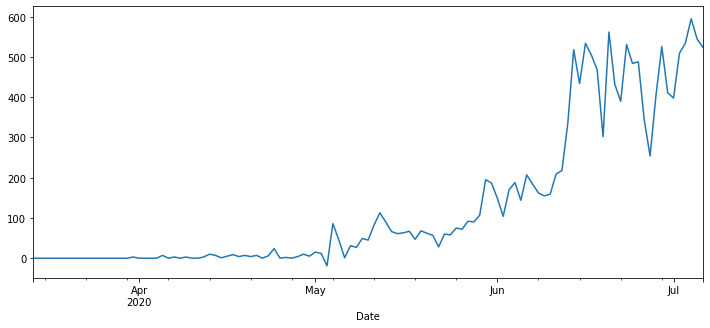

In [14]:
df[para].plot(figsize=(12,5));

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [16]:
adf_test(df[para])

Augmented Dickey-Fuller Test: 
ADF test statistic        2.310753
p-value                   0.998962
# lags used              13.000000
# observations          101.000000
critical value (1%)      -3.496818
critical value (5%)      -2.890611
critical value (10%)     -2.582277
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


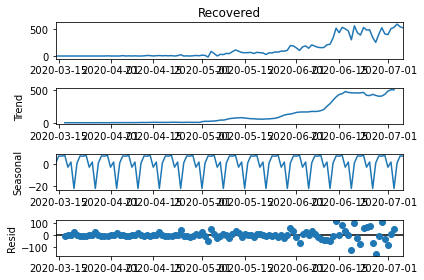

In [17]:
result = seasonal_decompose(df[para])
result.plot();

In [18]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df[para],k_diff=2)

In [19]:
adf_test(df['d1'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.207203
p-value                  0.000641
# lags used             13.000000
# observations          99.000000
critical value (1%)     -3.498198
critical value (5%)     -2.891208
critical value (10%)    -2.582596
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [20]:
# stepwise_fit = auto_arima(df[para], start_p=0, start_q=0,
#                           max_p=4, max_q=4,
#                           seasonal=False,
#                           d=None, trace=True,
#                           error_action='ignore',   # we don't want to know if an order does not work
#                           suppress_warnings=True,  # we don't want convergence warnings
#                           stepwise=True)           # set to stepwise

# stepwise_fit.summary()

stepwise_fit = auto_arima(df[para], start_p=0, start_q=0,
                          max_p=4, max_q=4,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True,           # set to stepwise
                         frequency=9)

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=1242.963, BIC=1248.435, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=1237.319, BIC=1245.527, Time=0.046 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=1231.665, BIC=1239.874, Time=0.054 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=1241.744, BIC=1244.480, Time=0.009 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=1231.761, BIC=1242.706, Time=0.101 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=1230.975, BIC=1241.920, Time=0.095 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=1232.510, BIC=1246.191, Time=0.220 seconds
Fit ARIMA(0,1,3)x(0,0,0,0) [intercept=True]; AIC=1232.511, BIC=1246.191, Time=0.139 seconds
Fit ARIMA(1,1,3)x(0,0,0,0) [intercept=True]; AIC=1234.464, BIC=1250.881, Time=0.272 seconds
Total fit time: 0.961 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -611.488
Date:                Tue, 14 Jul 2020   AIC                           1230.975
Time:                        15:59:35   BIC                           1241.920
Sample:                             0   HQIC                          1235.417
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7555      2.639      1.802      0.072      -0.417       9.928
ma.L1         -0.3313      0.050     -6.641      0.000      -0.429      -0.234
ma.L2         -0.1699      0.053     -3.227      0.001      -0.273      -0.067
sigma2      2664.9821    194.150     13.726      0.000    2284.454    3045.510
===================================================================================
Ljung-Box (Q):                       26.21   Jarque-Bera (JB):               166.77
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              86.68   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
train = df.iloc[:90]
test = df.iloc[90:]

In [22]:
# from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
# model = ARIMA(train[para],order=(0, 1, 2))
model = SARIMAX(train[para],order=(0, 1, 2),seasonal_order=(0,1,2,9))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Recovered   No. Observations:                   90
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 9)   Log Likelihood                -367.551
Date:                           Tue, 14 Jul 2020   AIC                            745.101
Time:                                   15:59:36   BIC                            757.011
Sample:                               03-14-2020   HQIC                           749.876
                                    - 06-11-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4760      0.124     -3.841      0.000      -0.719      -0.233
ma.L2         -0.1276      0.114     -1.120      0.263      -0.351       0.096
ma.S.L9       -1.0366      0.157     -6.601      0.000      -1.344      -0.729
ma.S.L18       0.4238      0.200      2.117      0.034       0.031       0.816
sigma2       500.7462     48.294     10.369      0.000     406.091     595.402
===================================================================================
Ljung-Box (Q):                       45.99   Jarque-Bera (JB):               105.45
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):             122.52   Skew:                             1.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
# predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(2,2,1) Predictions')
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(0,1,2,9) Predictions')

# df['forecast'] = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(2,2,1) Predictions')

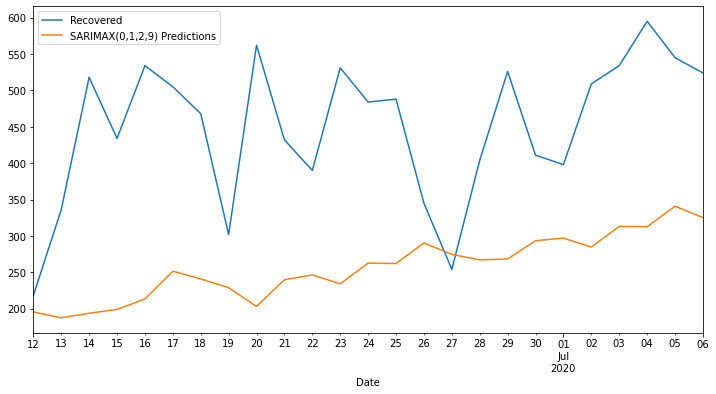

In [25]:
# Obtain predicted values
ax = test[para].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
# df['forecast'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [26]:
# # from statsmodels.tools.eval_measures import rmse
# from statsmodels.tools.eval_measures import mse

# error = mse(test[para], predictions)
# # print(f'ARIMA(2,2,1) RMSE Error: {error:11.10}')
# # print(f'ARIMA(2,2,1) MSE Error: {error:11.10}')
# print(f'SARIMAX(2,2,1,3) MSE Error: {error:11.10}')

In [27]:
from sklearn.metrics import mean_absolute_error
MAPE = mean_absolute_error(predictions, test[para])
MAPE

194.47220160124095

In [28]:
per_MAPE = (MAPE/sum(test[para]))*100
print(per_MAPE,'%')

1.7291028861139943 %


In [29]:
type(predictions)

pandas.core.series.Series

In [30]:
df['forecast'] = predictions
df

,Confirmed,Recovered,Decreased,d1,forecast
Date,,,,,
2020-03-14,0,0,0,NaN,NaN
2020-03-15,0,0,0,NaN,NaN
2020-03-16,0,0,0,0.0,NaN
2020-03-17,1,0,0,0.0,NaN
2020-03-18,0,0,0,0.0,NaN
...,...,...,...,...,...
2020-07-02,649,509,16,124.0,284.749116
2020-07-03,669,534,18,-86.0,313.167802
2020-07-04,743,595,19,36.0,312.625861


In [31]:
dictt = {f'{para}':test[para],f'Predicted_{para}':predictions}
dictt

{'Recovered': Date
 2020-06-12    218
 2020-06-13    336
 2020-06-14    518
 2020-06-15    434
 2020-06-16    534
 2020-06-17    505
 2020-06-18    468
 2020-06-19    302
 2020-06-20    562
 2020-06-21    432
 2020-06-22    390
 2020-06-23    531
 2020-06-24    484
 2020-06-25    488
 2020-06-26    345
 2020-06-27    254
 2020-06-28    404
 2020-06-29    526
 2020-06-30    411
 2020-07-01    398
 2020-07-02    509
 2020-07-03    534
 2020-07-04    595
 2020-07-05    545
 2020-07-06    524
 Freq: D, Name: Recovered, dtype: int64,
 'Predicted_Recovered': 2020-06-12    195.557874
 2020-06-13    187.541265
 2020-06-14    193.747774
 2020-06-15    199.037744
 2020-06-16    213.281947
 2020-06-17    251.569163
 2020-06-18    240.960535
 2020-06-19    228.959115
 2020-06-20    203.169181
 2020-06-21    239.733794
 2020-06-22    246.490696
 2020-06-23    234.212245
 2020-06-24    262.630932
 2020-06-25    262.088991
 2020-06-26    290.338289
 2020-06-27    274.671762
 2020-06-28    267.150211


In [32]:
predicted_df = pd.DataFrame(dictt)
predicted_df

,Recovered,Predicted_Recovered
Date,,
2020-06-12,218,195.557874
2020-06-13,336,187.541265
2020-06-14,518,193.747774
2020-06-15,434,199.037744
2020-06-16,534,213.281947
2020-06-17,505,251.569163
2020-06-18,468,240.960535
2020-06-19,302,228.959115
2020-06-20,562,203.169181


In [33]:
# predicted_df.to_csv('Predicted_WB.csv')
predicted_csv = pd.read_csv('Predicted_WB.csv')

predicted_csv.Date = pd.to_datetime(predicted_csv.Date)
predicted_csv.set_index('Date', inplace=True)
predicted_csv.index.freq = 'D'
# print(predicted_csv)
# predicted_csv = pd.concat([predicted_csv,predicted_df],axis=1,ignore_index=True)
predicted_csv = pd.merge(predicted_csv, predicted_df, left_index=True, right_index=True, how='outer')
# predicted_csv = predicted_csv.join(predicted_df, how='outer')
print(predicted_csv)
predicted_csv.to_csv('Predicted_WB.csv')

            Confirmed  Predicted_Confirmed  Recovered  Predicted_Recovered
Date                                                                      
2020-06-12        476           480.036247        218           195.557874
2020-06-13        454           511.275847        336           187.541265
2020-06-14        389           500.677207        518           193.747774
2020-06-15        407           514.906621        434           199.037744
2020-06-16        415           521.360034        534           213.281947
2020-06-17        391           469.183379        505           251.569163
2020-06-18        435           486.885003        468           240.960535
2020-06-19        355           543.296845        302           228.959115
2020-06-20        441           565.444740        562           203.169181
2020-06-21        414           604.497600        432           239.733794
2020-06-22        413           598.776678        390           246.490696
2020-06-23        370    

In [34]:
from pandas.tseries.offsets import DateOffset
import datetime
future_dates=[datetime.datetime(2020, 7, 7)+ DateOffset(n=x)for x in range(0,25)]

In [35]:
future_datest_df=pd.DataFrame(index=future_dates,columns=df.columns)

In [36]:
future_datest_df.tail()

,Confirmed,Recovered,Decreased,d1,forecast
2020-07-27,NaN,NaN,NaN,NaN,NaN
2020-07-28,NaN,NaN,NaN,NaN,NaN
2020-07-29,NaN,NaN,NaN,NaN,NaN
2020-07-30,NaN,NaN,NaN,NaN,NaN
2020-07-31,NaN,NaN,NaN,NaN,NaN


In [37]:
future_df=pd.concat([df,future_datest_df])
future_df = future_df.drop("d1", axis=1)
future_df

,Confirmed,Recovered,Decreased,forecast
2020-03-14,0,0,0,NaN
2020-03-15,0,0,0,NaN
2020-03-16,0,0,0,NaN
2020-03-17,1,0,0,NaN
2020-03-18,0,0,0,NaN
...,...,...,...,...
2020-07-27,NaN,NaN,NaN,NaN
2020-07-28,NaN,NaN,NaN,NaN
2020-07-29,NaN,NaN,NaN,NaN
2020-07-30,NaN,NaN,NaN,NaN


In [38]:
future_df[[para, 'forecast']]

,Recovered,forecast
2020-03-14,0,NaN
2020-03-15,0,NaN
2020-03-16,0,NaN
2020-03-17,0,NaN
2020-03-18,0,NaN
...,...,...
2020-07-27,NaN,NaN
2020-07-28,NaN,NaN
2020-07-29,NaN,NaN
2020-07-30,NaN,NaN


In [39]:
# future_df['forecast'] = results.predict(start = 115, end = 139, dynamic= True)
future_pred = results.predict(start=115, end=139, dynamic=False, typ='levels')

In [40]:
future_df['forecast'] = future_pred

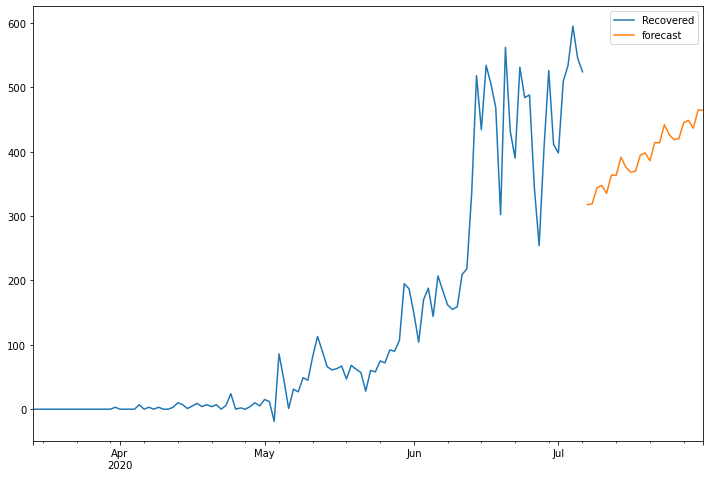

In [41]:
future_df[[para, 'forecast']].plot(figsize=(12, 8))

In [42]:
dicttt = {f'Future_Predicted_{para}':future_pred}
dicttt

{'Future_Predicted_Recovered': 2020-07-07    317.687081
 2020-07-08    318.863798
 2020-07-09    343.952773
 2020-07-10    347.564437
 2020-07-11    335.285986
 2020-07-12    363.704672
 2020-07-13    363.162731
 2020-07-14    391.412030
 2020-07-15    375.745503
 2020-07-16    368.223952
 2020-07-17    369.400668
 2020-07-18    394.489643
 2020-07-19    398.101307
 2020-07-20    385.822856
 2020-07-21    414.241543
 2020-07-22    413.699602
 2020-07-23    441.948900
 2020-07-24    426.282373
 2020-07-25    418.760822
 2020-07-26    419.937539
 2020-07-27    445.026514
 2020-07-28    448.638178
 2020-07-29    436.359727
 2020-07-30    464.778413
 2020-07-31    464.236472
 Freq: D, dtype: float64}

In [43]:
future_predicted_df = pd.DataFrame(dicttt)
future_predicted_df

,Future_Predicted_Recovered
2020-07-07,317.687081
2020-07-08,318.863798
2020-07-09,343.952773
2020-07-10,347.564437
2020-07-11,335.285986
2020-07-12,363.704672
2020-07-13,363.162731
2020-07-14,391.412030
2020-07-15,375.745503
2020-07-16,368.223952


In [44]:
# future_predicted_df.index.names = ['Date']
# future_predicted_df.index.freq = 'D'
# future_predicted_df.to_csv('Future_Predicted_WB.csv')

future_predicted_csv = pd.read_csv('Future_Predicted_WB.csv')

future_predicted_csv.Date = pd.to_datetime(future_predicted_csv.Date)
future_predicted_csv.set_index('Date', inplace=True)
future_predicted_csv.index.freq = 'D'
# print(future_predicted_csv)
# future_predicted_csv = pd.concat([future_predicted_csv,future_predicted_df],axis=1,ignore_index=True)
future_predicted_csv = pd.merge(future_predicted_csv, future_predicted_df, left_index=True, right_index=True, how='outer')
# predicted_csv = predicted_csv.join(predicted_df, how='outer')
print(future_predicted_csv)
future_predicted_csv.to_csv('Future_Predicted_WB.csv')

            Future_Predicted_Confirmed  Future_Predicted_Recovered
Date                                                              
2020-07-07                  872.550449                  317.687081
2020-07-08                  841.864642                  318.863798
2020-07-09                  870.818906                  343.952773
2020-07-10                  881.674017                  347.564437
2020-07-11                  828.086136                  335.285986
2020-07-12                  859.877723                  363.704672
2020-07-13                  916.093254                  363.162731
2020-07-14                  946.111125                  391.412030
2020-07-15                 1029.870908                  375.745503
2020-07-16                 1009.111592                  368.223952
2020-07-17                 1038.005734                  369.400668
2020-07-18                 1037.934598                  394.489643
2020-07-19                  984.081849                  398.10